In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [2]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from xgboost import XGBClassifier

In [4]:
X_train_res = pd.read_csv('X_train_res.csv')
y_train_res = pd.read_csv('y_train_res.csv')
X_test_res = pd.read_csv('X_test_res.csv')
y_test_res = pd.read_csv('y_test_res.csv')

pca = PCA(n_components=30)
X_train_reduced = pca.fit_transform(X_train_res)
X_test_reduced = pca.transform(X_test_res)

xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgboost_model.fit(X_train_reduced, y_train_res)

y_pred = xgboost_model.predict(X_test_reduced)

accuracy = accuracy_score(y_test_res, y_pred)
report = classification_report(y_test_res, y_pred, target_names=["Class 0", "Class 1"])

print("XGBoost Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Performance:
Accuracy: 0.8685
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.93      0.88    365842
     Class 1       0.92      0.81      0.86    365842

    accuracy                           0.87    731684
   macro avg       0.87      0.87      0.87    731684
weighted avg       0.87      0.87      0.87    731684



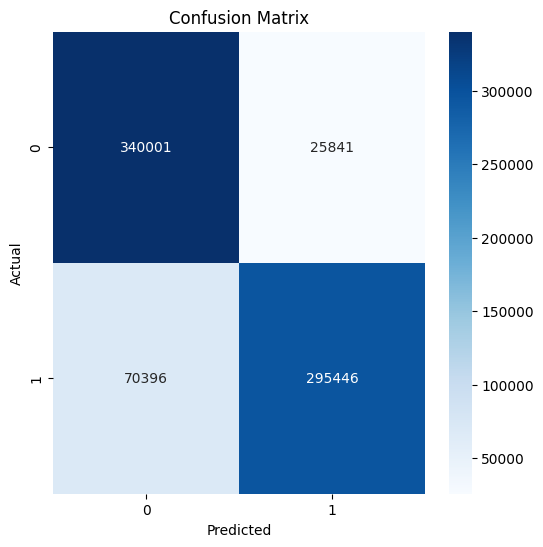

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_res, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()